In [1]:
	pip install kaggle

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alizazahid05","key":"87adbbe5ce9b94ae0e183181f63bcf49"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [4]:
!kaggle datasets download -d aungpyaeap/supermarket-sales


Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
License(s): other
  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 2.78MB/s]


In [5]:
!unzip supermarket-sales.zip


Archive:  supermarket-sales.zip
  inflating: supermarket_sales - Sheet1.csv  


In [6]:
import os
os.listdir('/content')


['.config',
 'supermarket_sales - Sheet1.csv',
 'kaggle.json',
 'supermarket-sales.zip',
 'sample_data']

In [7]:
#loading and inspecting the dataset
import pandas as pd
df= pd.read_csv('/content/supermarket_sales - Sheet1.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [8]:
#checking for missing values
missing_values=df.isna().sum()
print(missing_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [10]:
#checking unique value counts
df.value_counts()

,,,,,,,,,,,,,,,,,count
Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,
101-17-6199,A,Yangon,Normal,Male,Food and beverages,45.79,7,16.0265,336.5565,3/13/2019,19:44,Credit card,320.53,4.761905,16.0265,7.0,1
641-62-7288,B,Mandalay,Normal,Male,Home and lifestyle,99.92,6,29.9760,629.4960,3/24/2019,13:33,Ewallet,599.52,4.761905,29.9760,7.1,1
633-91-1052,A,Yangon,Normal,Female,Home and lifestyle,12.03,2,1.2030,25.2630,1/27/2019,15:51,Cash,24.06,4.761905,1.2030,5.1,1
634-97-8956,A,Yangon,Normal,Male,Food and beverages,32.90,3,4.9350,103.6350,2/17/2019,17:27,Credit card,98.70,4.761905,4.9350,9.1,1
635-28-5728,A,Yangon,Normal,Male,Health and beauty,56.00,3,8.4000,176.4000,2/28/2019,19:33,Ewallet,168.00,4.761905,8.4000,4.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373-14-0504,A,Yangon,Member,Female,Sports and travel,71.63,2,7.1630,150.4230,2/12/2019,14:33,Ewallet,143.26,4.761905,7.1630,8.8,1
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,1
373-88-1424,C,Naypyitaw,Member,Male,Home and lifestyle,35.81,5,8.9525,188.0025,2/6/2019,18:44,Ewallet,179.05,4.761905,8.9525,7.9,1


In [26]:
#  Format columns (e.g., date format or categorical data).
#  Remove duplicates if necessary.
#formatting col (DAte)
df['Date']= pd.to_datetime(df['Date'],format="%m/%d/%Y")
print(df['Date'].dtype)
#fixing case Sensitivity
df['Gender']=df['Gender'].str.title()
df['Payment']=df['Payment'].str.title()
df['Product line']=df['Product line'].str.title()
#fixiing speeling issues
df['Payment']=df['Payment'].replace('Ewallet','E-Wallet')
print(df.head())

datetime64[ns]
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health And Beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic Accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home And Lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health And Beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports And Travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08     E-Wallet  522.83                 4.761905       26.1415  

In [14]:
#checking for duplicacy
checking_duplicacy=df.duplicated()
print(checking_duplicacy.sum())

0


In [15]:
#checking the data types
datatype=df.dtypes
print(datatype)

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


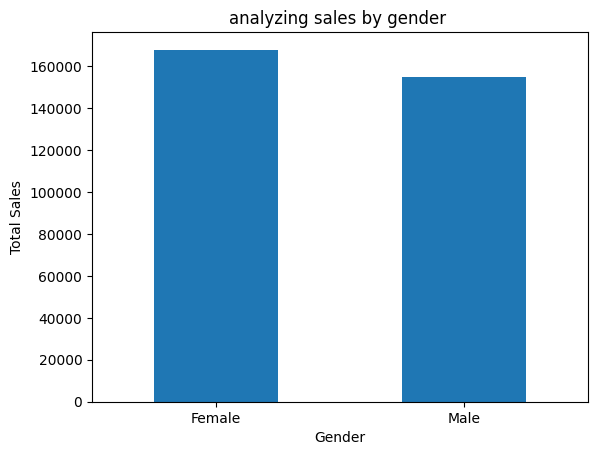

In [41]:
#Analyze sales by gender, product category, branch, and payment method.
#analyze sales by gender
import matplotlib.pyplot as plt
group_by_gender=df.groupby('Gender')['Total'].sum()
print(group_by_gender)
group_by_gender.plot(kind='bar')
plt.title("analyzing sales by gender ")
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

Product line
Electronic Accessories    54337.5315
Fashion Accessories       54305.8950
Food And Beverages        56144.8440
Health And Beauty         49193.7390
Home And Lifestyle        53861.9130
Sports And Travel         55122.8265
Name: Total, dtype: float64


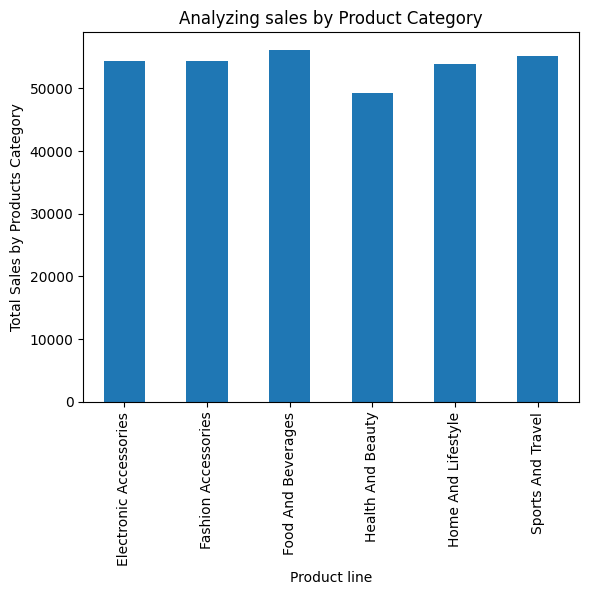

In [44]:
#analyze sales by product category
group_by_product_category=df.groupby('Product line')['Total'].sum()
print(group_by_product_category)
group_by_product_category.plot(kind='bar')
plt.title('Analyzing sales by Product Category')
plt.ylabel('Total Sales by Products Category')
plt.show()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


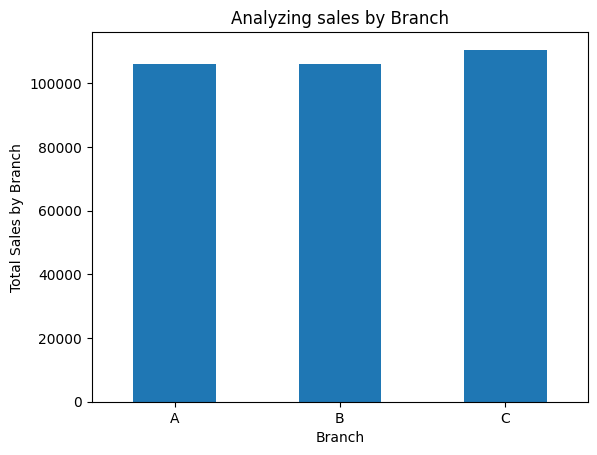

In [42]:
#analyze sales by Branch
group_by_branch=df.groupby('Branch')['Total'].sum()
print(group_by_branch)
group_by_branch.plot(kind='bar')
plt.title('Analyzing sales by Branch')
plt.ylabel('Total Sales by Branch')
plt.xticks(rotation=0)
plt.show()

Payment
Cash           112206.570
Credit Card    100767.072
E-Wallet       109993.107
Name: Total, dtype: float64


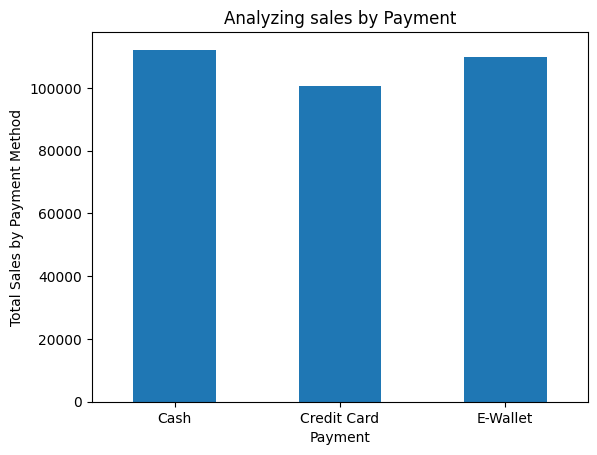

In [43]:
#analyze sales by payment method
group_by_payment = df.groupby('Payment')['Total'].sum()
print(group_by_payment)
group_by_payment.plot(kind='bar')
plt.title('Analyzing sales by Payment')
plt.ylabel('Total Sales by Payment Method')
plt.xticks(rotation=0)
plt.show()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


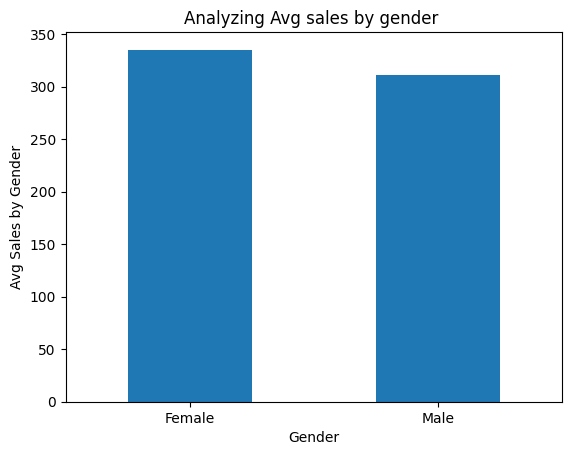

In [71]:
#Study customer demographics (e.g., gender, age group) and their spending behavior.
#by gender
group_by_gender=df.groupby('Gender')['Total'].mean()
print(group_by_gender)
group_by_gender.plot(kind='bar')
plt.title("Analyzing Avg sales by gender ")
plt.ylabel('Avg Sales by Gender')
plt.xticks(rotation=0)
plt.show()

Payment
Cash           326.181890
Credit Card    324.009878
E-Wallet       318.820600
Name: Total, dtype: float64


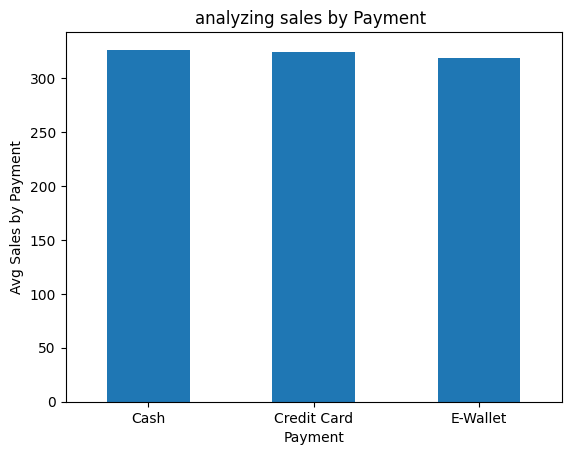

In [40]:
#by Payment
group_by_Payment=df.groupby('Payment')['Total'].mean()
print(group_by_Payment)
group_by_Payment.plot(kind='bar')
plt.title("analyzing sales by Payment ")
plt.ylabel('Avg Sales by Payment')
plt.xticks(rotation=0)
plt.show()

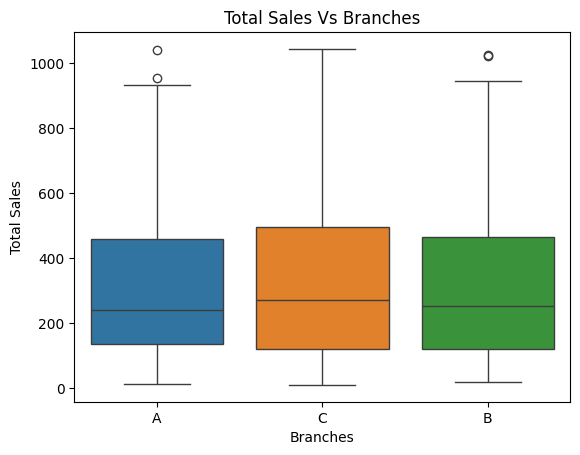

In [55]:
#Total Sales vs. Branches
import seaborn as sns
sns.boxplot(x='Branch',y='Total',data=df,hue='Branch')
plt.title("Total Sales Vs Branches")
plt.xlabel("Branches")
plt.ylabel("Total Sales")
plt.show()

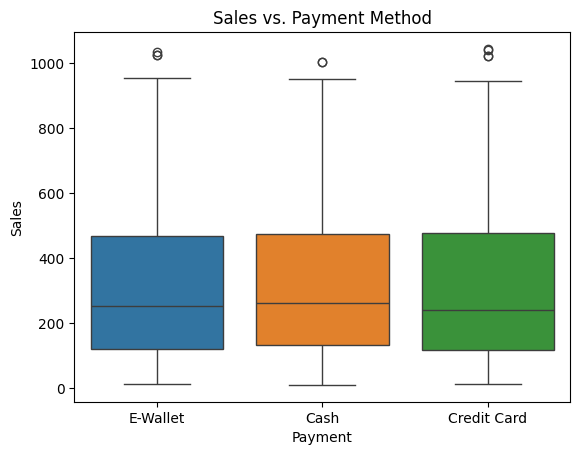

In [54]:
#Sales vs. Payment Method
sns.boxplot(x='Payment',y='Total',data=df,hue='Payment')
plt.title("Sales vs. Payment Method")
plt.xlabel("Payment")
plt.ylabel("Sales")
plt.show()

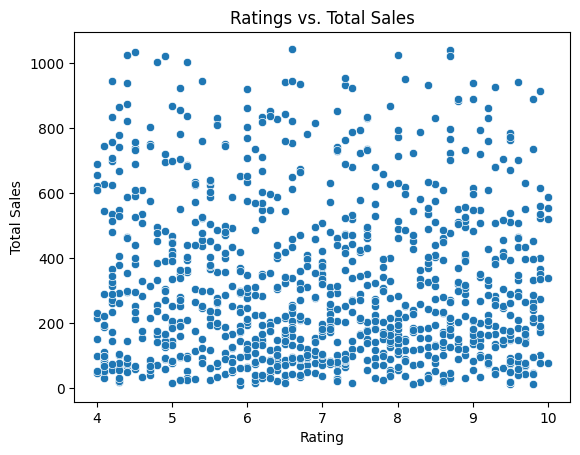

In [56]:
#Ratings  vs. Sales
sns.scatterplot(x='Rating',y='Total',data=df)
plt.title("Ratings vs. Total Sales")
plt.xlabel("Rating")
plt.ylabel("Total Sales")
plt.show()

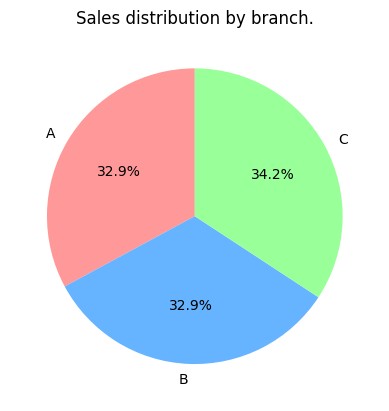

In [61]:
#Pie chart: Sales distribution by branch.
plt.pie(
    group_by_branch,
    labels=group_by_branch.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title('Sales distribution by branch.')
plt.show()

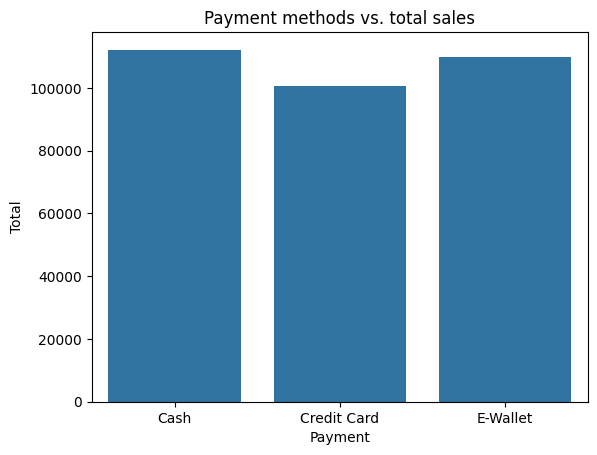

In [64]:
#Bar chart: Payment methods vs. total sales.
sales_by_payment = df.groupby('Payment')['Total'].sum().reset_index()
sns.barplot(x='Payment',y='Total',data=sales_by_payment)
plt.title('Payment methods vs. total sales')
plt.show()

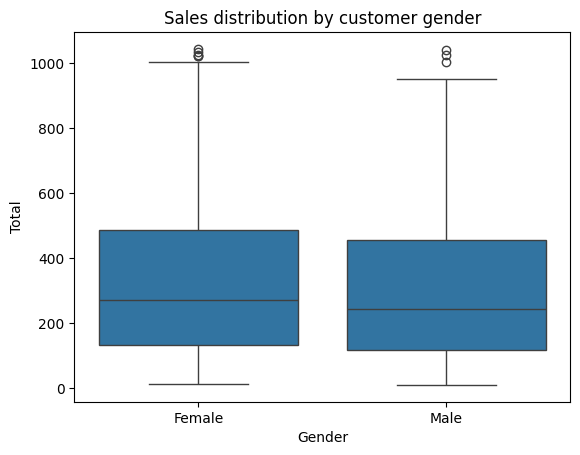

In [67]:
#Boxplot: Sales distribution by customer gender
sns.boxplot(x='Gender',y='Total',data=df)
plt.title("Sales distribution by customer gender")
plt.show()

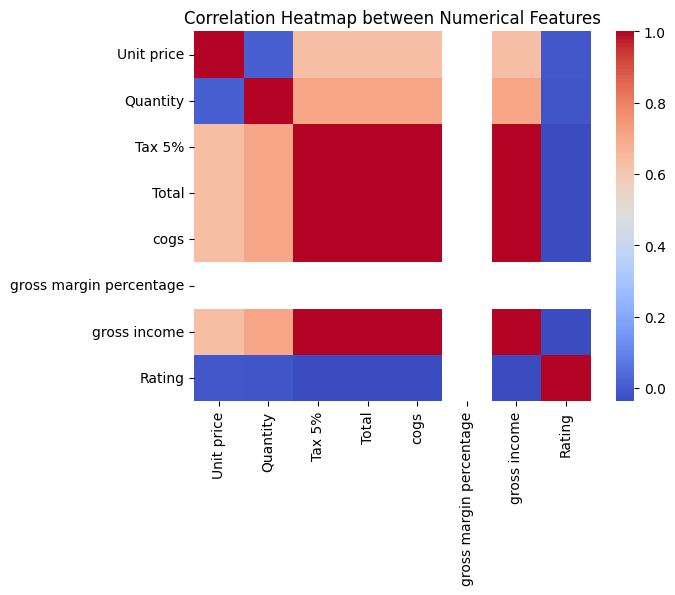

In [70]:
#Heatmap: Correlation between numerical features.
# Select numerical columns for correlation
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.title('Correlation Heatmap between Numerical Features')
plt.show()